In [2]:
from stock import* 
import numpy as np
import akshare as ak
import pandas as pd

In [6]:
import numpy as np
stock_list=["sh600519","sh603517","sh600031",
            "sz000858","sh603816","sh600690",
            "sh600519","sz002493","sh601318",
            "sz000895","sz002415","sh601021",
            "sz000333","sz300413","sz002332"]
#stock_list2=list(stock_zh_a_spot_df['代码'][0:100])
day=70
#RF=RF/30
time = 21 # 持股时长
ExpReturn=[]
ExpCov=[]
stock_in_plan=[]
i=0
for s in stock_list:
    i+=1
    print(i,end=' ') # 显示工作进度
    data = ak.stock_zh_index_daily(symbol=s)
    if len(data)>900: # 考察历史900天的数据
        stock_in_plan.append(s)
        k=stock(data,s,day)
        ExpReturn.append((1+k.ExpReturn2())**time-1)
        ExpCov.append(k.His_Return2())
ExpReturn=np.array(ExpReturn)#*time
ExpCov=np.array(ExpCov)
ExpCov=np.cov(ExpCov)*time
ExpCov

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

array([[ 0.01481785,  0.00755671,  0.00742912,  0.01527827,  0.00811338,
         0.00125613,  0.01481785,  0.00556123,  0.00683764,  0.00300226,
         0.00232783,  0.00563945,  0.00366399,  0.00497586,  0.00551935],
       [ 0.00755671,  0.02852314,  0.00624641,  0.01064322,  0.01108596,
         0.00147197,  0.00755671,  0.00602064,  0.00244653,  0.00336872,
         0.00219055,  0.00500239,  0.0028591 ,  0.00416816,  0.0085278 ],
       [ 0.00742912,  0.00624641,  0.02153761,  0.00981534,  0.00844161,
         0.00228872,  0.00742912,  0.00872147,  0.00672446,  0.00374259,
         0.00417452,  0.00597359,  0.00516241,  0.00510614,  0.00632349],
       [ 0.01527827,  0.01064322,  0.00981534,  0.02408984,  0.01133515,
         0.00236005,  0.01527827,  0.00804227,  0.00879105,  0.00389009,
         0.00309208,  0.00758866,  0.00501611,  0.00608708,  0.00751058],
       [ 0.00811338,  0.01108596,  0.00844161,  0.01133515,  0.02656981,
         0.00268026,  0.00811338,  0.00750848, 

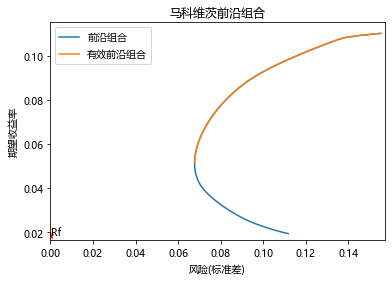

In [7]:
[target_variance, target_returns, PortWts, postive_target_returns, postive_target_variance]=frontcon(ExpReturn, ExpCov , 100)
# 找到满足前沿条件的解（上半直线）
plt.plot(target_variance, target_returns,label='前沿组合')
plt.plot(postive_target_variance, postive_target_returns,label='有效前沿组合')
plt.scatter(0,RF,s=50,marker='*',c='red')
plt.text(0.0001,RF,'Rf')
Min = np.array(target_returns).min()
Max = np.array(target_returns).max()
if RF > Min and RF < Max:
    plt.ylim(Min-0.002,Max+0.005)
elif RF > Max:
    plt.ylim(Min-0.002,RF+0.005)
elif RF < Min:
    plt.ylim(RF-0.002,Max+0.005)
plt.xlim(0,np.array(target_variance).max()+0.002)
plt.title("马科维茨前沿组合")
plt.xlabel("风险(标准差)")
plt.ylabel("期望收益率")
plt.legend()
plt.show()

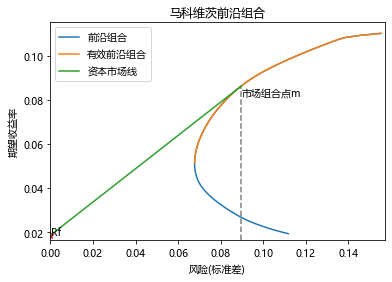

组合的beta系数是1.0
组合的sharp比为0.756487296195607


In [8]:
# 画证券市场线
[M,E_rm]=Get_M(postive_target_returns,postive_target_variance,RF)
x=[0,postive_target_variance[M]]
y=[RF,postive_target_returns[M]]
plt.plot(target_variance, target_returns,label='前沿组合')
plt.plot(postive_target_variance, postive_target_returns,label='有效前沿组合')
plt.plot(x,y,label='资本市场线')

plt.scatter(0,RF,s=50,marker='*',c='red')
plt.text(0.0001,RF,'Rf')

Min = np.array(target_returns).min()
Max = np.array(target_returns).max()
if RF > Min and RF < Max:
    Min = Min-0.002
    Max = Max+0.005
elif RF > Max:
    Min = Min-0.002
    Max = RF+0.005
elif RF < Min:
    Min = RF-0.002
    Max = Max+0.005
plt.ylim(Min,Max)
plt.vlines(postive_target_variance[M],Min,postive_target_returns[M],linestyles = "dashed",color='gray')
plt.text(postive_target_variance[M]+0.0001,postive_target_returns[M]-0.005,'市场组合点m')
plt.xlim(0,np.array(target_variance).max()+0.002)
plt.title("马科维茨前沿组合")
plt.xlabel("风险(标准差)")
plt.ylabel("期望收益率")
plt.legend()
plt.show()

m=len(target_returns)-len(postive_target_returns)+M
Beta=beta(sigma_rp(ExpCov,PortWts,m),target_variance[m])
print('组合的beta系数是%s'%Beta)
Sharp=sharp_rate(target_returns[m],target_variance[m])
print('组合的sharp比为%s'%Sharp)


In [15]:
plan(stock_in_plan,PortWts[m],100000).perchase_plan()

股票sh603816(顾家家居)购买300股
股票sz002493(荣盛石化)购买1600股
股票sh601318(中国平安)购买300股
